In [2]:
import numpy as np

Ödev1) Boş Copy Nedir? ".Copy" Nedir, yazdıktan sonra neleri değiştirir, neleri değiştirmez ?
DeepCopy Nedir? Shadow Copy Nedir? Bunlar oluşturduğumuz df'de neleri değiştirir?

>pd.copy() fonksiyonu Pandasta bulunan bir fonksiyon olmakla beraber içerisinde "deep=True/False" parametresi bulunmaktadır. Genel olarak Copy fonksiyonu elimizdeki DataFrame/Series'i kopyalamak için kullanılır ancak oluşturulan kopyanın nitelikleri "deep" parametresinin değerine yani kopyanın  Shallow veya Deep Copy olmasına göre değişkenlik gösterir.

>Shallow Copy(pd.copy(deep=False))'da indisleri ve datayı kopyalamaz referansları kopyalar ve birinde yapılan herhangi bir değişiklik diğerini de etkilemektedir.

>Deep Copy(pd.copy(deep=False))'de ise orjinal dataframeden indis ve data kopyalanır, birinde yapılan değişiklik diğerini etkilemez.

Ödev2) e-01 yerine 0.78'i nasıl görebiliriz?

str.format(num) with str as “{:.nf}”.
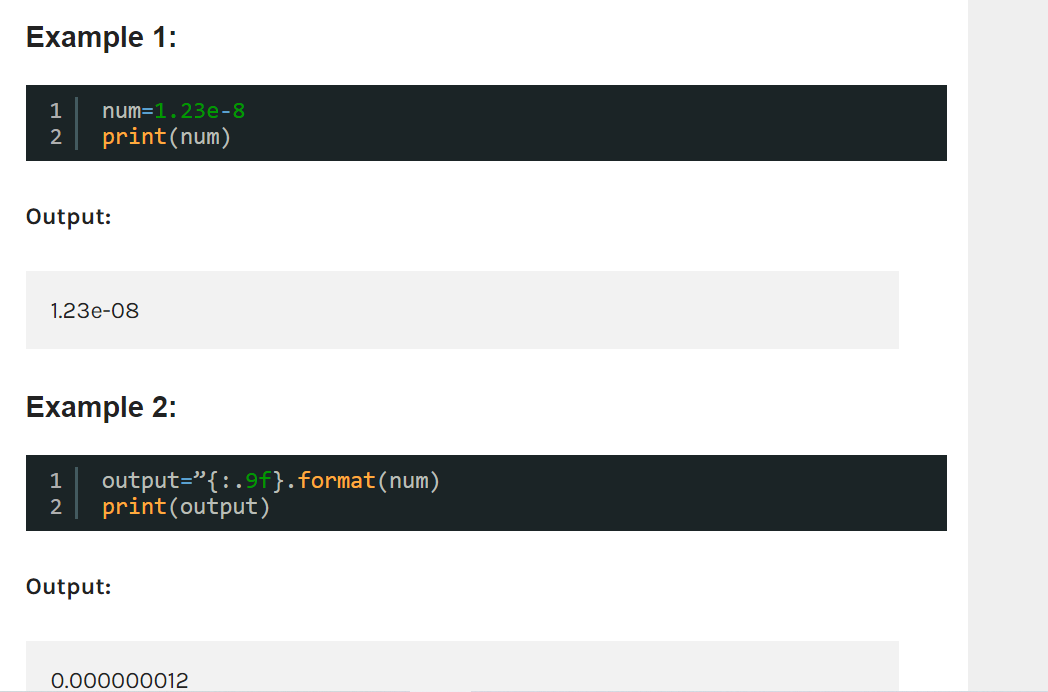

Ödev3)"np.Log()" doğal logoritma dediğimiz şekilde mi gelir yoksa log 2 tabanında mı gelir?

np.log() fonksiyonunda logaritma tabanı e sayısına yani euler sayısına göredir.Log 10  tabanında işlem yapmak istersek np.log10() fonksiyonu kullanılabilir veya Log 2 tabanında işlem yapmak istersek  np.log2() fonksiyonu kullanılabilir.

In [6]:
np.log(10)

2.302585092994046

Ödev4)Yeo-Johnson çok büyük değerlerde uygulanamıyor mu? Neden Income değerlerindeki "10" olan değerimizi arttırdığımızda(1000 yaptığımızda) çıktımızda bozulmalar oluyor?

>Yeo-Johnson, veri setindeki değerlerin pozitif olma şartı olmadan kullanılabildiği bir dönüşüm metodudur. Bir diğer deyişle, veri setinde negatif ve sıfır değere sahip gözlemler olduğunda kullanışlıdır

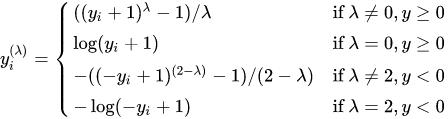

Yeo-Johnsonda Lambda(λ) parametresi eğer kullanıcı tarafından verilmezse, veriye özgü olarak belirlenir.

In [7]:
import pandas as pd
df = pd.DataFrame({
    "Income": [15,18,120,10],
    "Age": [25,-1818,42,51],
    "Income_2":[15000,18000,120000,10000]
})

df_scaled= df.copy()
col_names=["Income","Age","Income_2"]
features=df_scaled[col_names]
features
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method="yeo-johnson")
df_scaled[col_names]=scaler.fit_transform(features.values)
df_scaled

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,Income,Age,Income_2
0,-0.317514,-0.165105,0.0
1,0.006579,-1.546334,0.0
2,1.543055,0.613769,0.0
3,-1.232121,1.097670,0.0


Aşağıda görüldüğü gibi Box-Cox gibi Yeo-Johnsonda reweighted maximum likelihood yöntemini kullanarak belirlediği Lambda parametrelerinde 3.Sütunda diğerlerine göreceli negatif büyük bir değer elde etmiş.

In [8]:
scaler.lambdas_

array([ -0.92945142,   1.49358606, -18.94427159])